CSCI P-556: Applied Machine Learning

Fall 2019

Assignment 4

Due: 11:59PM, December 6, 2019

Read dataset

In [170]:
import pandas as pd

train = pd.read_csv('a4-train.csv', index_col=0)
test = pd.read_csv('a4-test.csv', index_col=0)
# print(df.shape)
# print(train.head)
print(train.shape)
print(test.shape)

(2000, 501)
(600, 501)


Task 1: Perform exploratory data analysis (15 points)

In [171]:
# EDA 0: Count of features, samples, target variable distribution

print(train.info)

<bound method DataFrame.info of       feat_0  feat_1  feat_2  feat_3  ...  feat_497  feat_498  feat_499  labels
0        485     423     504     493  ...       474       567       538       0
1        483     499     520     467  ...       485       492       477       1
2        487     486     495     481  ...       493       421       488       1
3        480     427     531     458  ...       516       495       469       0
4        491     472     430     463  ...       468       497       435       1
...      ...     ...     ...     ...  ...       ...       ...       ...     ...
1995     483     452     477     467  ...       471       503       531       1
1996     494     562     451     484  ...       474       495       527       1
1997     496     494     475     497  ...       504       517       531       0
1998     483     495     472     480  ...       494       540       506       0
1999     493     434     479     484  ...       470       469       447       0

[2000 r



*   There are 500 features and 2000 samples
*   The target variable has binary values



Since there are large number of features for the fewer number of samples, we may have to perform feature selection to prevent over-fitting.

feat_0       9.00
feat_1      39.00
feat_2      51.00
feat_3      13.00
feat_4      53.00
            ...  
feat_496     8.00
feat_497    18.00
feat_498    51.00
feat_499    34.25
labels       1.00
Length: 501, dtype: float64


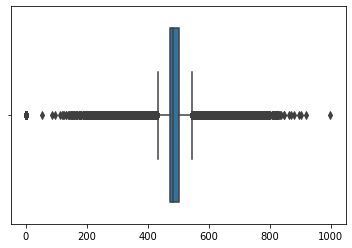

In [172]:
# EDA 1: Detecting Outliers
# Reference: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
import seaborn as s
s.boxplot(x=train)
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Outliers are datapoints that sit seperate from the general trend in its values.The box plot above shows us the outliers for the entire train dataset, Additionally, IQR(Interquartile range) sore is also calculated for each feature. It gives us an idea of how data is distributed around the median. It is simply the difference between the data in the third and first quartile. A large value means there could be datapoints that are farther apart from each other, leading to outliers.

Distribution of target variable,'labels'



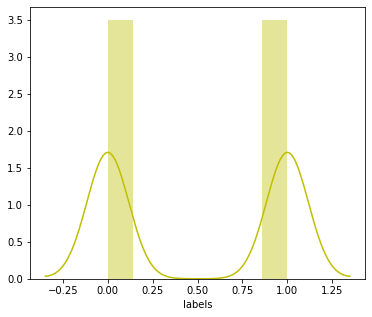

In [173]:
# EDA 2: Distribution of target varible, 'label'
# There is equal distribution of data in target variable
# Reference: https://www.activestate.com/blog/exploratory-data-analysis-using-python/
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
print("Distribution of target variable,'labels'\n")
s.distplot(train['labels'],color='y')

The above is the distribtion of the target variable, 'labels'. From the graph, we can infer that the target variable is binary and is distributed equally. Thta is, among our 2000 samples, 1000 are 1s and 100 are 0s.

In [174]:
# EDA 3: Correlation - Finding most relevant features and their importance value
# Reference: https://www.activestate.com/blog/exploratory-data-analysis-using-python/

target_labels=train.select_dtypes(include=['int64']).corr()['labels'][:-1]
best_features=target_labels[abs(target_labels)>0.05].sort_values(ascending=False)
print("The top " + str(len(best_features))+" most relevant features are:")
print(best_features)
# best_features = pd.Series(best_features)
# print(best_features.to_frame())

The top 26 most relevant features are:
feat_475    0.219933
feat_241    0.217827
feat_128    0.126758
feat_105    0.126263
feat_48     0.118477
feat_378    0.115962
feat_424    0.057546
feat_282    0.056781
feat_204    0.052946
feat_119    0.052070
feat_136    0.051341
feat_384    0.050499
feat_430   -0.052284
feat_55    -0.053091
feat_496   -0.053324
feat_296   -0.054608
feat_205   -0.054752
feat_411   -0.055710
feat_323   -0.064676
feat_493   -0.095056
feat_453   -0.095540
feat_472   -0.112071
feat_442   -0.114356
feat_338   -0.121788
feat_64    -0.150327
feat_336   -0.151672
Name: labels, dtype: float64


Now, we need to see how related features are with each other and the target variable. The above is a list of 'importance' value of the top 'n' most important features with respect to target variable. And below is the heat map/ correlation matrix of these 'n' features and target variable.

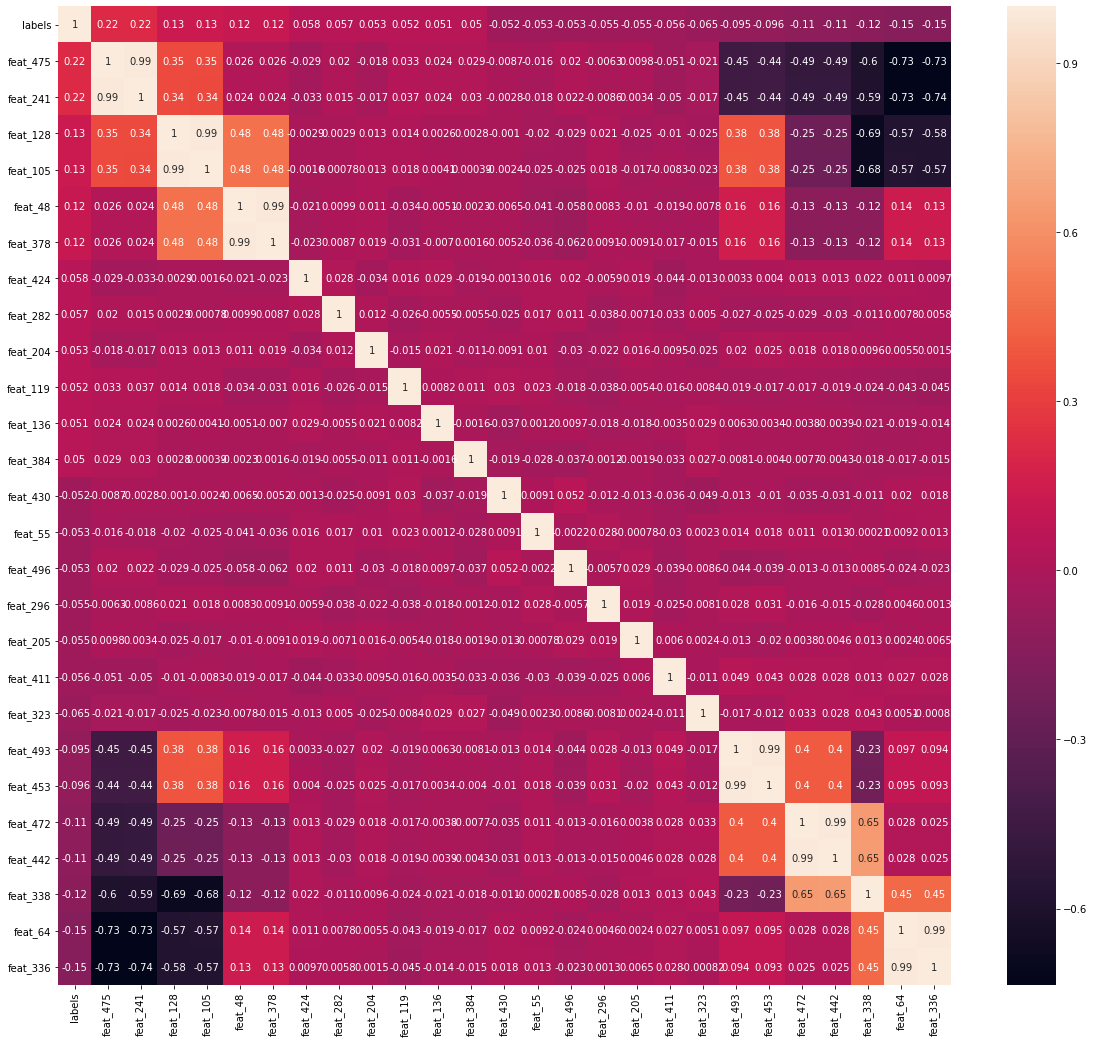

In [175]:
# EDA 3: Correlation - Plotting the Correlation Matrix for the features obtained above
# Reference: https://www.activestate.com/blog/exploratory-data-analysis-using-python/
from matplotlib.pyplot import figure

features_for_CM=['labels']
for key in best_features.iteritems():
  features_for_CM.append(key[0])
figure(figsize=(20, 18))  
corr_mat=train[features_for_CM].corr()
s.heatmap(corr_mat,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fa2c9cd30>,
      dtype=object)

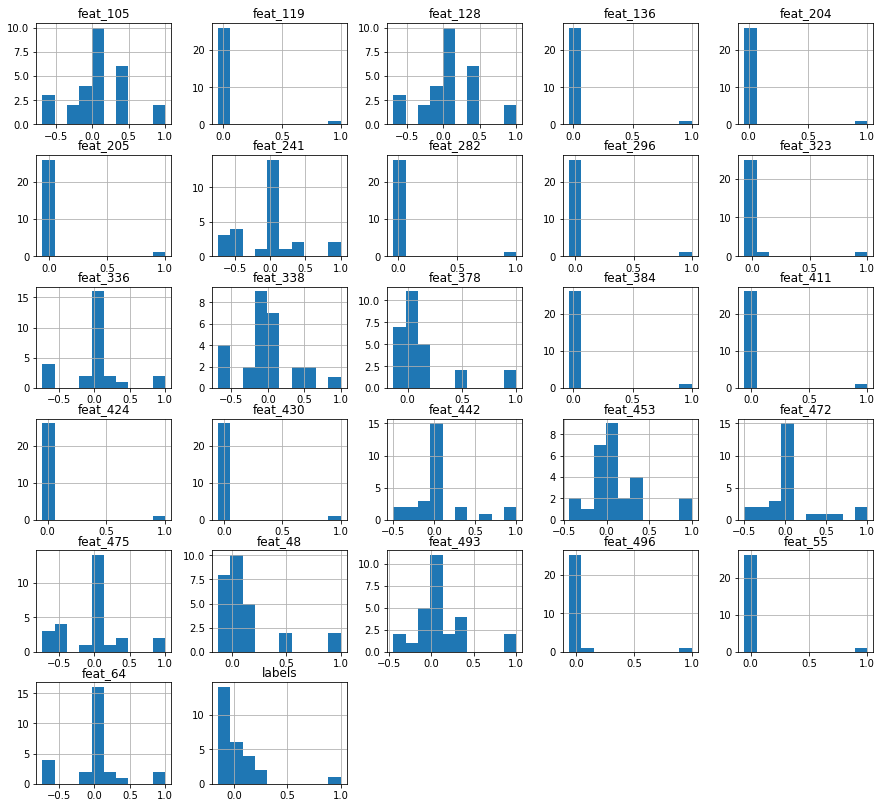

In [176]:
# EDA 5: Data Distribution in the above features and target variable
# Reference: https://www.activestate.com/blog/exploratory-data-analysis-using-python/
corr_mat.hist(figsize=(15,14))

The above are the data distribution in the 'n' most important features. Note that more often than not the features have distribution resembling that of feat_119.

Task 2: Use scikit-learn's logistic regression to establish a baseline model. We are not expecting this model to perform well, we just want to know what is the highest accuracy that we can achieve without doing any feature engineering and/or parameter tuning. (5 points)

In [177]:
# Reference: https://www.pluralsight.com/guides/importing-and-splitting-data-into-dependent-and-independent-features-for-ml
# Splitting features and target for Train and Test data
x_train = pd.DataFrame(train.iloc[:, :-1].values)
print(x_train.shape)
y_train = pd.DataFrame(train.iloc[:, -1].values)
print(y_train.shape)

x_test = pd.DataFrame(test.iloc[:, :-1].values)
print(x_test.shape)
y_test = pd.DataFrame(test.iloc[:, -1].values)
print(y_test.shape)

(2000, 500)
(2000, 1)
(600, 500)
(600, 1)


In [178]:
# Reference:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# In  the above reference, it says, "For small datasets, ‘liblinear’ is a good choice,..".
# Sice the dataset has only ~2000 samples, it can be considered as a small 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
# print(x_train.shape,y_train.shape)
lr.fit(x_train,y_train.values.ravel())

print("Accuracy of Train in LR model = "+str(lr.score(x_train,y_train)*float(100))+"%")
print("Accuracy of Test in LR model = "+str(lr.score(x_test,y_test)*float(100))+"%")

Accuracy of Train in LR model = 74.5%
Accuracy of Test in LR model = 59.0%


Task 3: Feature engineering. On this task you'll write code to modify your features such that the model can achieve a higher accuracy. You are free to modify the data as you want, but a rationale has to be provided for each modification. Additionally, if you are using anything that has not been convered in class, write a brief description of how the function works. Note that copy/pasting a function's docstring is not what we are asking and we will take off points if this is what you do. (20 points)

In [0]:
# ATTEMPT 1 AT FEATURE ENGINEERING THAT WAS DISCARDED
# # Removing outliers

# import numpy as np
# drop_list=[]

# # Reference for Log Transform: https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
# for i in range(0,x_train.shape[1]):
#     x_train[i] = (x_train[i]-x_train[i].min()+1) .transform(np.log)

# # References:
# # https://www.thoughtco.com/what-is-the-interquartile-range-rule-3126244
# # To find cells that are outliers: https://thispointer.com/pandas-count-rows-in-a-dataframe-all-or-those-only-that-satisfy-a-condition/
# # Capping the outliers: https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
# # Calculating IQR: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

# for i in range(0,x_train.shape[1]):
#     Q1 = x_train[i].quantile(0.25)
#     Q3 = x_train[i].quantile(0.75)
#     IQR = Q3 - Q1
#     TT = x_train.apply(lambda x_train: True if x_train[i] > (Q3 + 1.5 * IQR) or x_train[i] < (Q3 - 1.5 * IQR) else False , axis=1)
#     x_train.loc[(x_train[i] > (Q3 + 1.5 * IQR)),i] = (Q3 + 1.5 * IQR)
#     x_train.loc[(x_train[i] < (Q1 - 1.5 * IQR)),i] = (Q1 - 1.5 * IQR)
#     count = len(TT[TT == True].index)
#     if count > x_train.shape[0]/6:
#         drop_list.append(i)

# print("The features that can be dropped are:")
# print(drop_list)



# x_train=x_train.drop(drop_list,axis=1) 
# x_test=x_test.drop(drop_list,axis=1) 

The features that can be dropped are:
[7, 38, 53, 120, 198, 207, 332, 471]


I first took the log transform of the dataset to get the values in the range between 0 and 1.
My first approach to feature selection was to manually drop columns that had outliers more than a threshold. To do this, I first calculated an upper and lower bound based on the IQR that was obtained for each column. If the number of data points that lay outside the boundaries are greater 1/6th of the total number of samples, then that column/feature can be dropped. 

However, this did not give me many features to drop and so the accuracy on the below four models only increased by a maximum of two percent. So, I moved on to search for a more robust model for feature selection.

Note: You can see the features eligible to be dropped by uncommenting the above cell and running.

In [179]:
# Reference for RandomForestClassifier for detecting outliers:
# https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784
# https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np

# ==================Number of features that were tried for===========================
# max_features=200,150,120,100,50
# ====================================================================================
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100,criterion='entropy'),max_features=120)
sel.fit(x_train, y_train.values.ravel())
T_or_F=sel.get_support()
drop_columns = np.array(np.where(T_or_F == False)).tolist()[0]

# print(drop_columns)
# print(x_train.shape,x_test.shape)
x_train=x_train.drop(drop_columns,axis=1) 
x_test=x_test.drop(drop_columns,axis=1) 
print("Number of features dropped: "+str(len(drop_columns)))
print(x_train.shape,x_test.shape)
# sel.predict()

Number of features dropped: 380
(2000, 120) (600, 120)


After being introduced to the idea of using Decision Trees for feature selection, I tried out Random Forest Classifier which gave a much better accuracy for the models. 
Random Forest Classifier works by creating a large number of Decision Trees for a single or combination of random features and datapoints. Each node in the trees will divide the dataset into similar and dissimilar features. Here I have used 'entropy' as the criterion for calculation of this similarity/dissimilarity or 'impurity'. A high value means there is high impurity. If a feature reduces the impurity, then it can be a 'useful' feature.

Once, the Random Forest Classifier gives us the required feature, we use SelectFromModel to select the top 'n' features out of these most relevant features by specifying a value for the 'max_features' parameter. This is an Embedded method for feature selection.

I tried the four models in Task 4 on various number of samples. The best accuracy was when feature count was 50. However, this meant there was a major reduction in eatures. So, after trying on more number of features, I settled for 120 features. 
After each model, I have included the accuracy for 50 features for reference.

Task 4: Model building & evaluation. Train at least 4 models:


1.   Neural network (any type of NN is fine)
2.   Decision tree (can be a plain decision tree, random forest, gradient boosted trees, etc.)
3.   Support vector machine
4.   Your choice of Naive Bayes or K-nearest neighbors

For model 4, briefly (no more than 2 paragraphs) describe how the model works. 

Part of your grade will depend on how your best model performs against the best model of all the classmates, as determined by the accuracy achieved using the test set. You are encouraged to share your best model's accuracy on Piazza, but not which feature engineering or model tuning steps you took to achieve it. (60 points)

In [180]:
# References for NN:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
# Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(solver='adam',hidden_layer_sizes=(290,290),alpha=0.001,learning_rate='adaptive',random_state=1)
clf.fit(x_train, y_train.values.ravel())
y_pred=clf.predict(x_test)
y_pred_train=clf.predict(x_train)
print("Train Accuracy: "+str(accuracy_score(y_train, y_pred_train)*float(100))+"%")
print("Test Accuracy: "+str(accuracy_score(y_test, y_pred)*float(100))+"%")

Train Accuracy: 67.55%
Test Accuracy: 63.0%


Performance when no. of samples = 50

Train Accuracy: 67.5%

Test Accuracy: 65.16666666666666%

In [181]:
from sklearn.ensemble import GradientBoostingClassifier

dt = GradientBoostingClassifier(learning_rate=0.01,n_estimators=250).fit(x_train, y_train.values.ravel())
y_pred_dt_test = dt.predict(x_test)
y_pred_dt_train = dt.predict(x_train)
print("Train Accuracy: "+str(accuracy_score(y_train, y_pred_dt_train)*100)+"%")
print("Test Accuracy: "+str(accuracy_score(y_test, y_pred_dt_test)*100)+"%")

Train Accuracy: 80.7%
Test Accuracy: 75.66666666666667%


Performance when no. of samples = 50

Train Accuracy: 80.25%

Test Accuracy: 76.0%


In [182]:
# References for SVM:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Support Vector Machine
from sklearn import svm

SVM = svm.SVC(gamma='scale').fit(x_train,y_train.values.ravel())
y_pred_svm_test = SVM.predict(x_test)
y_pred_svm_train = SVM.predict(x_train)
print("Train Accuracy: "+str(accuracy_score(y_train, y_pred_svm_train)*100)+"%")
print("Test Accuracy: "+str(accuracy_score(y_test, y_pred_svm_test)*100)+"%")

Train Accuracy: 90.5%
Test Accuracy: 75.0%


Performance when no. of samples = 50

Train Accuracy: 87.0%

Test Accuracy: 80.66666666666666%

In [0]:
# # Gaussian Naive Bayes
# # from sklearn.naive_bayes import CategoricalNB
# from sklearn.naive_bayes import GaussianNB

# nb = GaussianNB().fit(x_train, y_train.values.ravel())
# y_pred_nb_test = nb.predict(x_test)
# y_pred_nb_train = nb.predict(x_train)
# print("Train Accuracy: "+str(accuracy_score(y_train, y_pred_nb_train)*100)+"%")
# print("Test Accuracy: "+str(accuracy_score(y_test, y_pred_nb_test)*100)+"%")

Train Accuracy: 71.39999999999999%
Test Accuracy: 59.166666666666664%


In [183]:
# KNearestNeighbors Refences:
# https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15,weights='uniform',algorithm='auto').fit(x_train,y_train.values.ravel())
y_pred_knn_train = knn.predict(x_train)
y_pred_knn_test = knn.predict(x_test)
print("Train Accuracy: "+str(accuracy_score(y_train, y_pred_knn_train)*100)+"%")
print("Test Accuracy: "+str(accuracy_score(y_test, y_pred_knn_test)*100)+"%")

Train Accuracy: 85.85000000000001%
Test Accuracy: 80.83333333333333%


Performance when no. of samples = 50

Train Accuracy: 87.25%

Test Accuracy: 85.83333333333333%

The KNeighborsClassifier was the best performing model for 120 and 50 samples.

**Working:**
The model looks at a data point's 'K' nearest neighbors and keeps a count for neighbors belongingto each label. Then the label assigned to the datapoint is the label with maximum count. KNN works well for low dimensionality which is our case here.

The model selects 'k' neighbors based on the algorithm that is specified. Here, I have used the 'kd_tree' algorithm. This uses the Binary Tree data structure and  at each step, the takes the column with highest variance and sorts the entire dataset. Then splits the dataset at the median. Then for each of the split dataset, we repeat the process for another column. This is done 'leaf_size' number of times and the final split datasets become the leaves of the tree.

References:

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

https://ashokharnal.wordpress.com/tag/ball-tree-explained-in-simple-manner/
 